In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
stock_data = pd.read_csv(data_url)

In [3]:
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# **Analyze the closing price from dataframe**

In [4]:
stock_data["Date"] = pd.to_datetime(stock_data.Date, format = "%Y-%m-%d")

In [5]:
stock_data.index = stock_data["Date"]

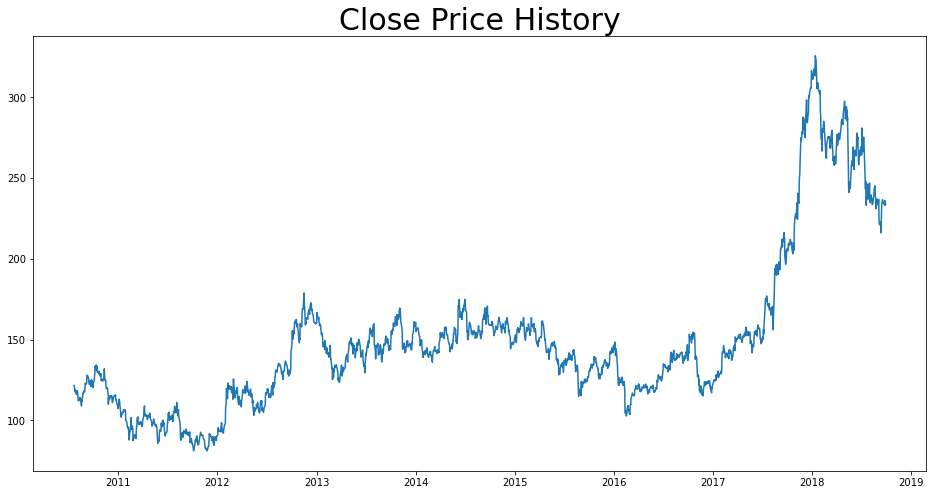

In [6]:
plt.figure(figsize = (16,8))
plt.plot(stock_data["Close"],label = "Close Price History")
plt.title("Close Price History", fontsize = 30)
plt.show()

# **Sort the dataset on date time and filter "Date" and "Close" columns**

In [7]:
data = stock_data.sort_index(ascending = True, axis = 0)

In [8]:
new_dataset = pd.DataFrame(index = range(0,len(stock_data)),columns=
                           ["Date","Close"])

In [9]:
for i in range(0,len(data)):
    new_dataset["Date"][i] = data["Date"][i]
    new_dataset["Close"][i] = data["Close"][i]

In [10]:
new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis = 1, inplace = True)

# **Normalized the new filtered Dataset**

In [11]:
final_data = new_dataset.index

In [14]:
train_data = final_data[0:1322]
valid_data = final_data[1322:]

In [18]:
final_data = np.array(final_data)

In [21]:
final_data = final_data.reshape(-1,1)

In [22]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(final_data)

In [23]:
X_train_data , y_train_data = [],[]

In [24]:
for i in range(60,len(train_data)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [25]:
X_train_data, y_train_data = np.array(X_train_data), np.array(y_train_data)

In [27]:
x_train_data = np.reshape(X_train_data,(X_train_data.shape[0],
                                        X_train_data.shape[1],1))

# **Modeling**

In [28]:
lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, 
                    input_shape = (X_train_data.shape[1],1)))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dense(1))

In [29]:
lstm_model.compile(loss = 'mean_squared_error',optimizer = "adam")
lstm_model.fit(X_train_data, y_train_data, epochs = 1, batch_size = 1,
              verbose = 2)

1262/1262 - 34s - loss: 6.8944e-04 - 34s/epoch - 27ms/step


In [30]:
inputs_data = new_dataset[len(new_dataset) - len(valid_data)-60:].values
inputs_data = inputs_data.reshape(-1,1)
inputs_data = scaler.transform(inputs_data)

In [31]:
X_test = []
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test = np.array(X_test)

In [37]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
prediction_price = lstm_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [35]:
train_data = new_dataset[:1322]
valid_data = new_dataset[1322:]

In [53]:
print(X_train_data,X_test)

[[0.00000000e+00 3.34336342e-04 6.68672685e-04 ... 2.74155801e-02
  2.77499164e-02 2.80842528e-02]
 [3.34336342e-04 6.68672685e-04 1.67168171e-03 ... 2.77499164e-02
  2.80842528e-02 2.84185891e-02]
 [6.68672685e-04 1.67168171e-03 2.00601805e-03 ... 2.80842528e-02
  2.84185891e-02 2.87529254e-02]
 ...
 [6.17519224e-01 6.17853561e-01 6.18187897e-01 ... 6.45937813e-01
  6.46272150e-01 6.46606486e-01]
 [6.17853561e-01 6.18187897e-01 6.18522233e-01 ... 6.46272150e-01
  6.46606486e-01 6.47609495e-01]
 [6.18187897e-01 6.18522233e-01 6.19525242e-01 ... 6.46606486e-01
  6.47609495e-01 6.47943831e-01]] [[[-4.95185557]
  [-4.95185557]
  [-4.95185557]
  ...
  [-4.95185557]
  [-4.95185557]
  [-4.95185557]]

 [[-4.95185557]
  [-4.95185557]
  [-4.95185557]
  ...
  [-4.95185557]
  [-4.95185557]
  [-4.95185557]]

 [[-4.95185557]
  [-4.95185557]
  [-4.95185557]
  ...
  [-4.95185557]
  [-4.95185557]
  [-4.95185557]]

 ...

 [[-4.95185557]
  [-4.95185557]
  [-4.95185557]
  ...
  [-4.95185557]
  [-4.951855

In [42]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [43]:
valid_data["Predictions"] = prediction_price

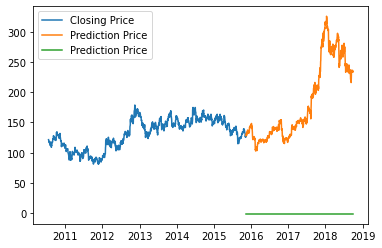

In [50]:
plt.plot(train_data["Close"], label = "Closing Price")
plt.plot(valid_data[["Close","Predictions"]], label = "Prediction Price")
plt.legend()
plt.show()